In [1]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/processed/WaterUpdated.csv')

df['new_target'] = df.target.map(lambda x: 'functional' if x == 'functional' else 'non functional')

df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,ward,...,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,target,time_passed,new_target
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,Mundindi,...,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,12,functional
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,Natta,...,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3,functional
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,Ngorika,...,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4,functional
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,...,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27,non functional
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,Nyakasimbi,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,11,functional


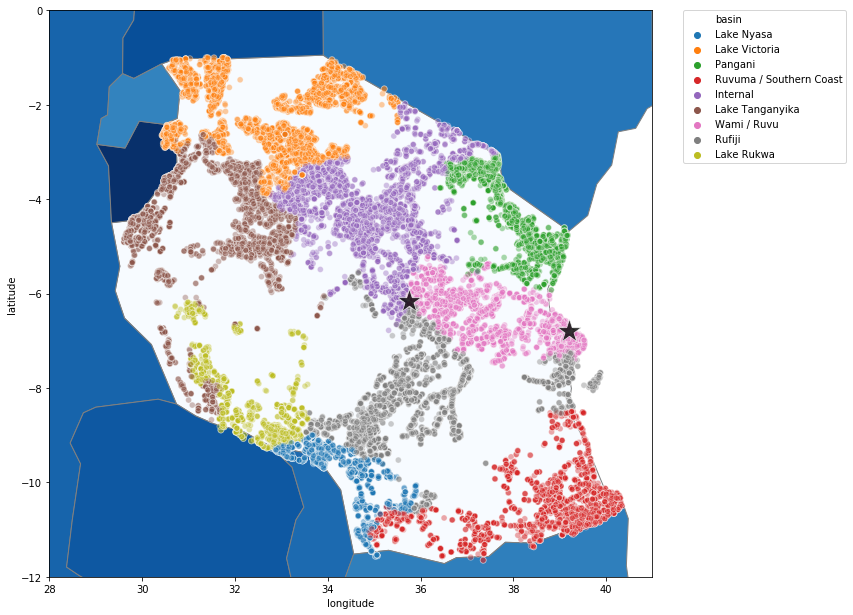

In [103]:
# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
# c_map = LinearSegmentedColormap.from_list(
#     'mycmap', [(0, 'grey'), (1, 'blue')])

# colors = {'Kenya':'red', 'Uganda':'red', 'Rwanda':'red', 'Burundi':'red', 'Dem. Rep. Congo':'red', 'Zambia':'red', 'Malawi':'red', 'Mozambique':'red', 'Tanzania':'blue'}

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

countries = ['Kenya', 'Uganda', 'Rwanda', 'Burundi', 'Dem. Rep. Congo', 'Zambia', 'Malawi', 'Mozambique', 'Tanzania']

map_section = world.loc[world.name.isin(countries)]
map_section['color'] = map_section.name.map(lambda x: 0.65 if x == 'Tanzania' else (0.8 + (np.random.sample() / 10)))


capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
city_centers_dict = {'Capital City': ['Dodoma', 'Dar es Salaam'], 'longitude': [35.7516, 39.2083], 'latitude': [-6.1630, -6.7924]}
city_centers = pd.DataFrame.from_dict(city_centers_dict)



fig, ax= plt.subplots(figsize=(12,12))

ax.set_aspect('equal')

map_section.plot(ax=ax, column='color', cmap='Blues', edgecolor='gray')

sns.scatterplot('longitude', 'latitude', data=df, alpha=0.4, ax=ax, hue='basin')
sns.scatterplot('longitude', 'latitude', data=city_centers, alpha=.8, ax=ax, marker='*', legend = 'full', color='black', s=600)

plt.ylim(-12, 0)
plt.xlim(28,41)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# fig, ax = world[world.continent == 'Africa'].plot(
#     color='white', edgecolor='gray')

# ax.scatter(functional['longitude'], functional['latitude'],
#            c='green',alpha=.5, s=1)

# ax.scatter(broken['longitude'], broken['latitude'],
#            c='red', alpha=.5, s=1)

# ['Pastel1', 'Pastel2', 'Paired', 'Accent',
#                         'Dark2', 'Set1', 'Set2', 'Set3',
#                         'tab10', 'tab20', 'tab20b', 'tab20c']

# plt.show()
plt.tight_layout()
plt.savefig('figures/basins.png')

In [97]:
map_section = world.loc[world.name.isin(countries)]
map_section['color'] = map_section.name.map(lambda x: 0.65 if x == 'Tanzania' else (0.8 + (np.random.sample() / 10)))


capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
city_centers_dict = {'Capital City': ['Dodoma', 'Dar es Salaam'], 'longitude': [35.7516, 39.2083], 'latitude': [-6.1630, -6.7924]}
city_centers = pd.DataFrame.from_dict(city_centers_dict)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,color
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.650000
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",0.844930
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",0.827288
70,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",0.856587
71,19196246,Africa,Malawi,MWI,21200.0,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715...",0.839613
72,26573706,Africa,Mozambique,MOZ,35010.0,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439...",0.819801
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...",0.893952
168,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",0.864734
169,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",0.816284


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
70,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
71,19196246,Africa,Malawi,MWI,21200.0,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715..."
72,26573706,Africa,Mozambique,MOZ,35010.0,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439..."
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762..."
168,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736..."
169,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891..."
